In [36]:
import pandas as pd
import numpy as np
import mysql.connector
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


In [37]:
# Connect to MySQL Database
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="",       # XAMPP default
    database="placement"
)

# Load table into DataFrame
query = "SELECT * FROM customers;"
df = pd.read_sql(query, conn)

conn.close()

df.head()


C:\Users\vijay\AppData\Local\Temp\ipykernel_3240\1520620302.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,SatisfactionScore,CardType,PointEarned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [38]:
print("Shape of dataset:", df.shape)
df.info()


Shape of dataset: (10000, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   RowNumber          10000 non-null  int64  
 1   CustomerId         10000 non-null  int64  
 2   Surname            10000 non-null  object 
 3   CreditScore        10000 non-null  int64  
 4   Geography          10000 non-null  object 
 5   Gender             10000 non-null  object 
 6   Age                10000 non-null  int64  
 7   Tenure             10000 non-null  int64  
 8   Balance            10000 non-null  float64
 9   NumOfProducts      10000 non-null  int64  
 10  HasCrCard          10000 non-null  int64  
 11  IsActiveMember     10000 non-null  int64  
 12  EstimatedSalary    10000 non-null  float64
 13  Exited             10000 non-null  int64  
 14  Complain           10000 non-null  int64  
 15  SatisfactionScore  10000 non-null  int64 

In [39]:
df.describe(include="all")


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,SatisfactionScore,CardType,PointEarned
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DIAMOND,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2507,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,NaN,606.515100
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,NaN,225.924839
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,NaN,119.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,NaN,410.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,NaN,605.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,NaN,801.000000


In [40]:
df.isnull().sum()


RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure               0
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
Complain             0
SatisfactionScore    0
CardType             0
PointEarned          0
dtype: int64

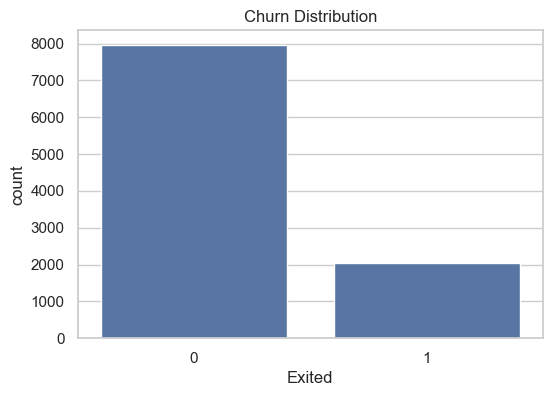

In [41]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Exited")
plt.title("Churn Distribution")
plt.show()


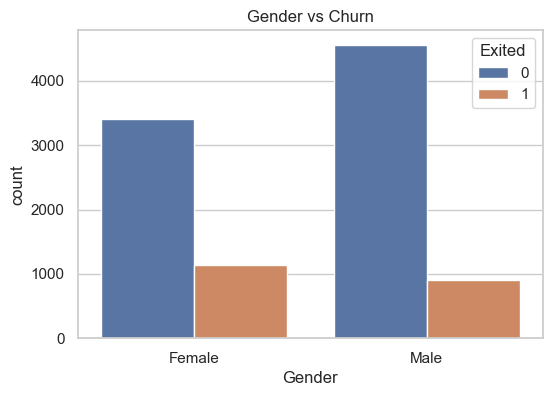

In [52]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Gender", hue="Exited")
plt.title("Gender vs Churn")
plt.show()


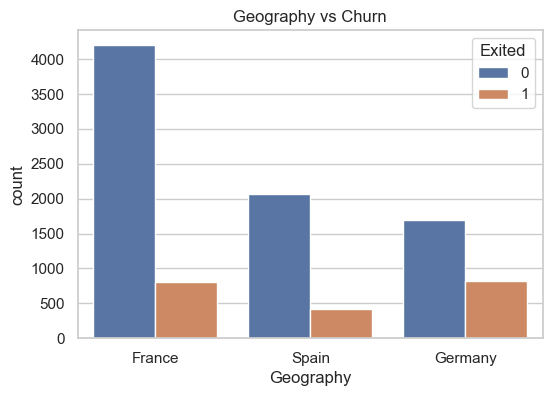

In [43]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Geography", hue="Exited")
plt.title("Geography vs Churn")
plt.show()


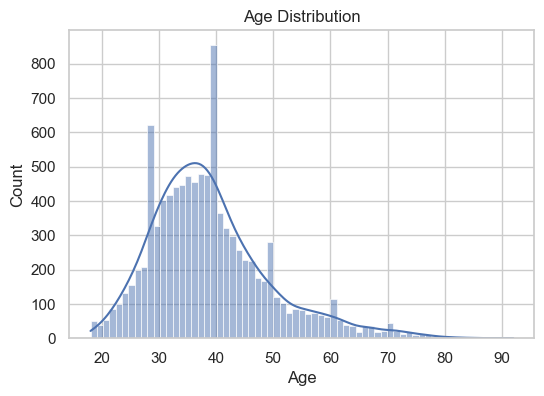

In [44]:
plt.figure(figsize=(6,4))
sns.histplot(df['Age'], kde=True)
plt.title("Age Distribution")
plt.show()


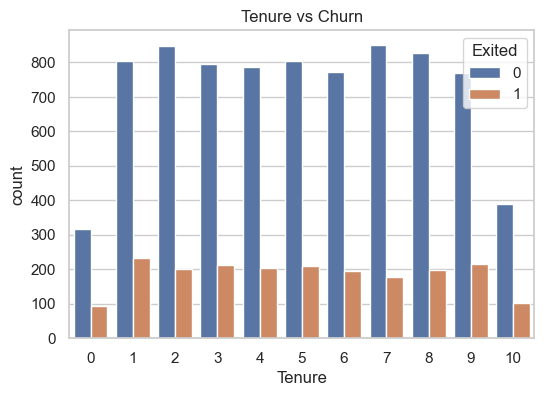

In [45]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Tenure", hue="Exited")
plt.title("Tenure vs Churn")
plt.show()


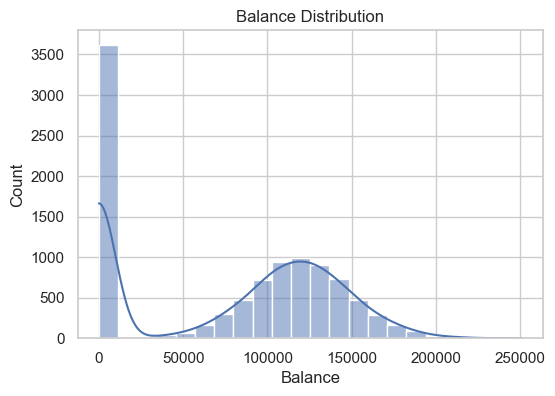

In [60]:
plt.figure(figsize=(6,4))
sns.histplot(df['Balance'],kde=True)
#sns.boxplot(data=df,x='Exited',y='Balance')
plt.title("Balance Distribution")
plt.show()


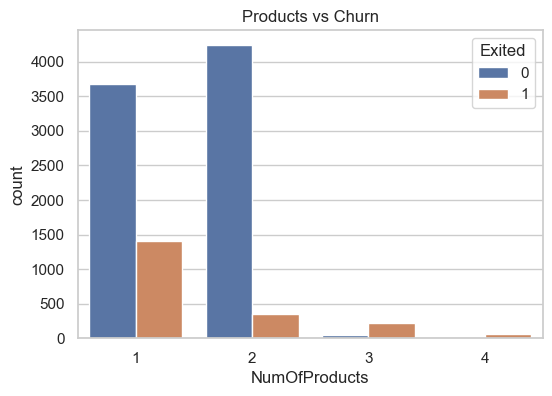

In [47]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="NumOfProducts", hue="Exited")
plt.title("Products vs Churn")
plt.show()


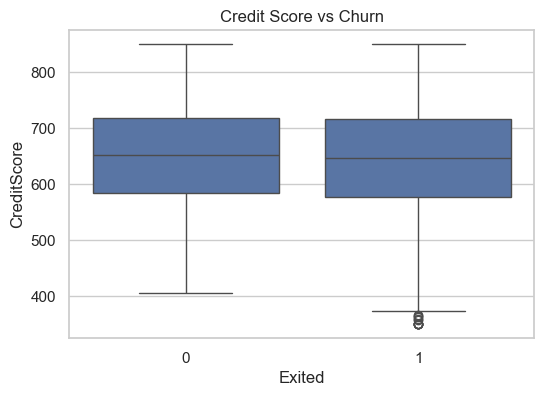

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x="Exited", y="CreditScore")
plt.title("Credit Score vs Churn")
plt.show()


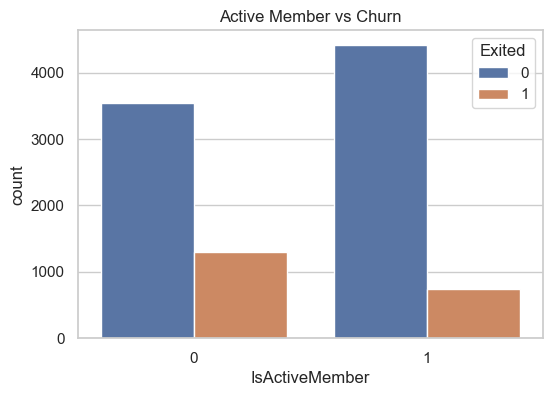

In [49]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="IsActiveMember", hue="Exited")
plt.title("Active Member vs Churn")
plt.show()


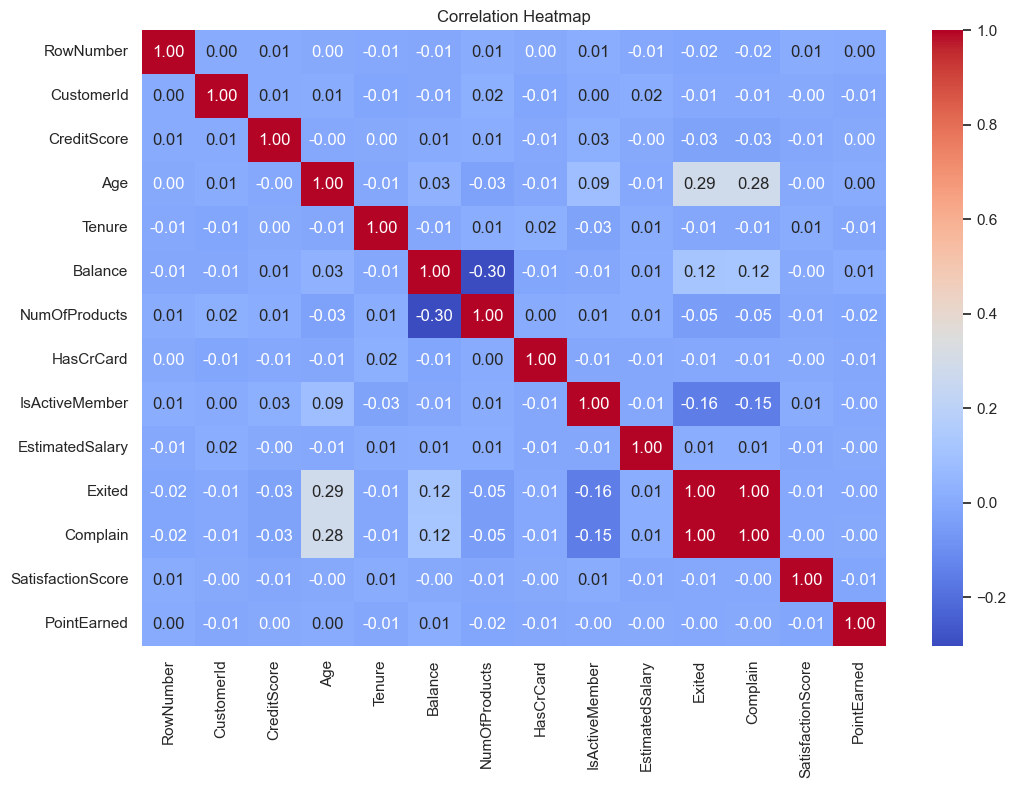

In [58]:
plt.figure(figsize=(12,8))

numeric_df = df.select_dtypes(include=['number'])

sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()



In [51]:
print("🔍 Key Insights:")
print("\n1. Churn Rate: {:.2f}%".format(df["Exited"].mean() * 100))
print("2. Average Age of churned customers:", df[df["Exited"]==1]["Age"].mean())
print("3. Average Balance of churned customers:", df[df["Exited"]==1]["Balance"].mean())
print("4. Average Credit Score of churned customers:", df[df["Exited"]==1]["CreditScore"].mean())


🔍 Key Insights:

1. Churn Rate: 20.38%
2. Average Age of churned customers: 44.83562315996075
3. Average Balance of churned customers: 91109.47600588812
4. Average Credit Score of churned customers: 645.4146221786065
